In [1]:
from matplotlib import pyplot as plt
from IPython import display
import numpy as np
import math
import warnings
import numpy as np
from datetime import datetime

# Example: Matplotlib basics

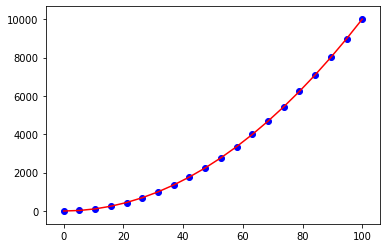

In [6]:
fig = plt.figure()
x = np.linspace(0,100,20)
y = x**2
plt.plot(x,y,color='red')
plt.scatter(x,y,color='blue')
# plt.xlim(20,40)
# plt.ylim(2000,6000)

# Example: updating a plot in place

In [7]:
def updatePlot(obj=None):
    fig = plt.figure()
    ax = plt.gca()
    hdisplay = display.display("", display_id=True)
    while obj != 'quit':
        obj = input('Enter a number')
        if obj == 'quit':
            plt.close()
            break
        n = int(obj)
        ax.scatter(n,n**2)
        hdisplay.update(fig)

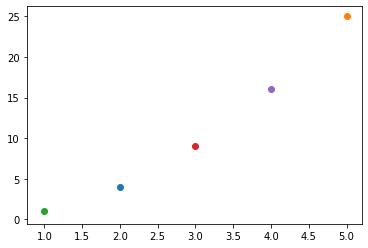

Enter a number2
Enter a number5
Enter a number1
Enter a number3
Enter a number4
Enter a numberquit


In [8]:
updatePlot()

# Example: kwargs

In [9]:
def plotRectangle(**kwargs):
    fig = plt.figure()
    ax = fig.gca()
    sq = plt.Rectangle((0,0), 2,2,**kwargs)
    ax.add_patch(sq)
    ax.set_xlim(-1,3)
    ax.set_ylim(-1,3)

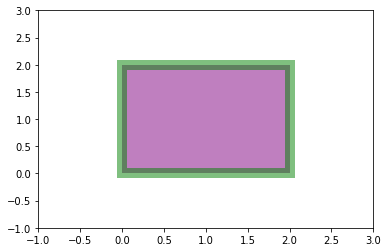

In [14]:
plotRectangle(facecolor='purple', edgecolor='green', linewidth=10, alpha=0.5)

# Task: Visualize Circle class

Fill out the plotCircle() method and fill out the init function to allow visualization of your circle class. You should be able to plot multiple circles on the same figure, and update the plot as you update your circle's parameters.

In [105]:
def getTime():
    now = datetime.now()
    current_time = now.strftime("%H:%M:%S:%f")
    return current_time

class Circle():
    """
    Function to create and edit a circle while calculating parameters and keeping track of previous changes to the circle.
    
    Parameters:
    ----------
    radius: Float
        Radius of the circle. Default is None.
    circum: Float
        Circumference of the circle. Default is None.
    area: Float
        Area of the circle. Default is None.
    history: Dict
        Dictionary tracking all chnages made to the size of the circle. Keys are the time the change was made and values are the new size (radius, circumference, area). Default is None.
        
    Returns:
    ----------
    calcCircle: Float
        Calculates and returns the radius, circumference, and area. Updates all three parameters.
    calcRadius: Float
        Calculates and returns the radius of the circle, and updates the radius parameter.
    calcCircum: Float
        Calculates and returns the circumference of the circle, and updates the circumference parameter.
    calcArea: Float
        Calculates and returns the area of the circle, and updates the area parameter.
    """
    def __init__(self, radius = None, circum = None, area = None, history = {},disp=False,ax=None,
                 fig=None,hdisplay=None,pos=(0,0),**kwargs):
        self.radius = radius
        self.circum = circum
        self.area = area
        self.history = history
        self.checkParams()
        self.calcCircle()
        self.circle = None
        
        ####### New params for visualization #######
        # Assign new inputs to self
        self.disp = disp
        self.pos = pos
        self.kwargs = kwargs
        if disp is True:
            if fig==None and ax==None and hdisplay==None:
                # Initialize new figure
                fig = plt.figure()
                ax = plt.gca()
                hdisplay = display.display("", display_id=True)
                ax.set_xlim(self.pos[0]-1.5*self.radius,self.pos[0]+1.5*self.radius)
                ax.set_ylim(self.pos[1]-1.5*self.radius,self.pos[1]+1.5*self.radius)
                plt.close()
            elif fig==None or ax==None or hdisplay==None:
                #Raise an error here
                raise TypeError('Must pass in all fig, ax, hdisplay or none.')
            self.ax = ax
            self.fig = fig
            self.hdisplay = hdisplay
            self.plotCircle()
            # Assign figure modifiers to self and call plotCircle

    def calcCircle(self):
        if self.radius != None:
            self.circum = 2*math.pi*self.radius
            self.area = math.pi*(self.radius**2)
        elif self.circum != None:
            self.radius = self.circum/(2*math.pi)
            self.area = math.pi*(self.radius**2)
        elif self.area != None:
            self.radius = math.sqrt(self.area/math.pi)
            self.circum = 2*math.pi*self.radius
        else:
            raise TypeError('All of the parameters are None.')
    def checkParams(self):
        params = np.asarray([self.radius, self.circum, self.area])
        params[params == None] = 0
#         print(params)
        numSet = sum(x != 0 for x in params)  
        if numSet > 1:
            if params[1] != params[0]*2*math.pi and params[0] != 0 and params[1] != 0:
                warnings.warn('The radius and circumference conflict. Calculating the parameters based on the the radius.')
            if params[2] != params[0]**2*math.pi and params[0] != 0 and params[2] != 0:
                warnings.warn('The radius and area conflict. Calculating the parameters based on the radius.')
            if params[1] != 0 and params[2] != 0 and params[0] == 0:
                radTemp = params[1]/(2*math.pi)
                areaTemp = radTemp**2*math.pi
                if params[2] != areaTemp:
                    warnings.warn('The circumference and area conflict. Calculating the paramters based on the circumference.')
    def calcRadius(self):
        self.calcCircle()
        return self.radius
    def calcCircum(self):
        self.calcCircle()
        return self.circum
    def calcArea(self):
        self.calcCircle()
        return self.area
    
    def expand(self, parameter, factor):
        try:
            factor = float(factor)
        except:
            raise TypeError('Enter a number for the factor.')
        if factor < 0:
            factor *= -1
            warnings.warn(f'The entered factor was negative. Calculating based on the additive inverse, {factor}.')
        if parameter == "r" or parameter == "c" or parameter == "a":
            if parameter == "r":
                self.radius *= factor
                self.circum = None
                self.area = None
            elif parameter == "c":
                self.radius = None
                self.circum *= factor
                self.area = None
            elif parameter == "a":
                self.radius = None
                self.circum = None
                self.area *= factor
            self.calcCircle()
            self.history[getTime()] = [self.radius, self.circum, self.area]
        else:
            raise TypeError('Enter radius (r), circumference (c), or area (a) for the parameter to expand.')
        if self.disp is True:
            self.plotCircle()
    
    def plotCircle(self):
        if self.circle != None:
            self.circle.remove()
        self.circle = plt.Circle(self.pos, self.radius, **self.kwargs)
        self.ax.add_patch(self.circle)
        xlim = np.asarray(self.ax.get_xlim())
        ylim = np.asarray(self.ax.get_ylim())
        print(xlim[1])
        print(self.pos[0])
        print(abs(xlim[1] - self.pos[0]))
        print(self.radius)
        if abs(xlim[0] - self.pos[0]) <= self.radius:
            xlim[0] = self.pos[0]-1.5*self.radius
            print('1')
        if abs(xlim[1] - self.pos[0]) >= self.radius:
            xlim[1] = self.pos[0]+1.5*self.radius
            print('2')
        self.ax.set_xlim(xlim)
        if abs(ylim[0] - self.pos[1]) <= self.radius:
            ylim[0] = self.pos[1]-1.5*self.radius
            print('3')
        if abs(ylim[1] - self.pos[1]) >= self.radius:
            ylim[1] = self.pos[1]+1.5*self.radius
            print('4')
        self.ax.set_ylim(ylim)

        self.ax.set_aspect('equal')
        self.hdisplay.update(self.fig)
    

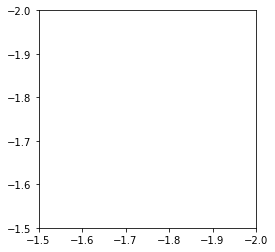

1.5
0
1.5
1
2
4


In [110]:
c = Circle(radius=1, disp=True, color='yellow')

In [87]:
c.expand('r',2)

In [111]:
c2 = Circle(radius=4,fig=c.fig,ax=c.ax,hdisplay=c.hdisplay,disp=True,color='red',pos=(-8,-8),alpha=0.5)

1.5
-8
9.5
4
2
4


In [34]:
c2.expand('r',4)

# Task: Visualize Binary Tree

In [ ]:
import numpy as np

class BinaryTree:
    def __init__(self, root=None):
        self.root = root
    def findParent(self, x, foundParent=None):
        if foundParent == None:
            foundParent = self.root
        if foundParent.hasRight() and x > foundParent.data:
            return self.findParent(x, foundParent.rightChild)
        if foundParent.hasLeft() and x < foundParent.data:
            return self.findParent(x, foundParent.leftChild)
        return foundParent
    def newNode(self, x):
        newParent = self.findParent(x)
        if x > newParent.data:
            return newParent.setRight(x)
        if x < newParent.data:
            return newParent.setLeft(x)
    def setHeight(self, height):
        self.height = height
        

class BinaryTreeNode:
    def __init__(self, data=None, parent=None, leftChild=None, rightChild=None):
        self.data = data
        self.parent = parent
        self.leftChild = leftChild
        self.rightChild = rightChild
        if self.parent == None:
            self.depth = 0
            self.tree = BinaryTree(root=self)
            self.tree.setHeight(0)
        else:
            self.depth = parent.depth + 1
            self.tree = parent.tree
            if self.depth > self.tree.height:
                self.tree.setHeight(self.depth)
        
    def setLeft(self, childData):
        self.leftChild = BinaryTreeNode(data=childData, parent=self)
        return self.leftChild
    def setRight(self,childData):
        self.rightChild = BinaryTreeNode(data=childData, parent=self)
        return self.rightChild
    def children(self):
        childList = []
        if self.hasLeft():
            childList.append(self.leftChild)
        if self.hasRight():
            childList.append(self.rightChild)
        return childList
    def hasLeft(self):
        if self.leftChild == None:
            return False
        else:
            return True
    def hasRight(self):
        if self.rightChild == None:
            return False
        else:
            return True
    def isRoot(self):
        if self.parent == None:
            return True
        else:
            return False
    def plotTree(self):
        ###### Fill this in
